In [1]:
! pip install -q kaggle



In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"huynguyen2010","key":"1f55d83547a0b5b8da02a1c165426d27"}'}

In [3]:
 ! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                           Vehicle Sales Data                                  19MB  2024-02-21 20:16:17           5948         93  1.0              
sazidthe1/world-gdp-growth                                   World GDP Growth                                    14KB  2024-02-25 11:37:58            945         22  1.0              
kanchana1990/spotifys-long-hits-2014-2024                    Spotify's Long Hits (2014-2024) 🎶                   38KB  2024-02-23 12:39:02           2042         48  1.0              
tarunrm09/climate-change-indicators                          Climate change Indi

In [7]:
! kaggle datasets download -d prajitdatta/movielens-100k-dataset

  0% 0.00/4.77M [00:00<?, ?B/s]
100% 4.77M/4.77M [00:00<00:00, 89.5MB/s]


In [8]:
! mkdir /content/dataset
! mv /content/movielens-100k-dataset.zip /content/dataset

In [9]:
!unzip /content/dataset/movielens-100k-dataset.zip -d /content/dataset/
!rm /content/dataset/movielens-100k-dataset.zip

Archive:  /content/dataset/movielens-100k-dataset.zip
  inflating: /content/dataset/ml-100k/README  
  inflating: /content/dataset/ml-100k/allbut.pl  
  inflating: /content/dataset/ml-100k/mku.sh  
  inflating: /content/dataset/ml-100k/u.data  
  inflating: /content/dataset/ml-100k/u.genre  
  inflating: /content/dataset/ml-100k/u.info  
  inflating: /content/dataset/ml-100k/u.item  
  inflating: /content/dataset/ml-100k/u.occupation  
  inflating: /content/dataset/ml-100k/u.user  
  inflating: /content/dataset/ml-100k/u1.base  
  inflating: /content/dataset/ml-100k/u1.test  
  inflating: /content/dataset/ml-100k/u2.base  
  inflating: /content/dataset/ml-100k/u2.test  
  inflating: /content/dataset/ml-100k/u3.base  
  inflating: /content/dataset/ml-100k/u3.test  
  inflating: /content/dataset/ml-100k/u4.base  
  inflating: /content/dataset/ml-100k/u4.test  
  inflating: /content/dataset/ml-100k/u5.base  
  inflating: /content/dataset/ml-100k/u5.test  
  inflating: /content/dataset/ml-

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit


In [11]:
from pathlib import Path
data_dir = Path('/content/dataset/ml-100k')

import os
os.listdir(data_dir)

['u2.test',
 'u.info',
 'mku.sh',
 'ua.base',
 'allbut.pl',
 'README',
 'u5.base',
 'u4.base',
 'ub.test',
 'u3.test',
 'u2.base',
 'u4.test',
 'u3.base',
 'u.occupation',
 'u.data',
 'u.user',
 'u5.test',
 'u1.test',
 'u.item',
 'ub.base',
 'ua.test',
 'u.genre',
 'u1.base']

In [12]:
columns_names=['user_id','item_id','rating','timestamp']

df1 = pd.read_csv(data_dir/'u.data', sep="\t",names=columns_names)

df1.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:

columns_names=['item_id','title','date', "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18", "A19", "A20", "A21"]
df2 = pd.read_csv(data_dir/'u.item', sep='|', encoding='latin-1', names=columns_names)

df2.head()

,item_id,title,date,A1,A2,A3,A4,A5,A6,A7,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
columns_names=['user_id','user_age','user_gender','user_occupation','zip_code']

df3 = pd.read_csv(data_dir/'u.user', sep="|",names=columns_names)

df3.head()

,user_id,user_age,user_gender,user_occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [15]:
movies=df2.iloc[: , 0:2]
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
df3.drop(["zip_code"], axis = 1, inplace = True)
df3.head()

,user_id,user_age,user_gender,user_occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [17]:
df = pd.merge(df1,movies, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [18]:
df = pd.merge(df, df3, on='user_id')
df.head()

,user_id,item_id,rating,timestamp,title,user_age,user_gender,user_occupation
0,196,242,3,881250949,Kolya (1996),49,M,writer
1,196,257,2,881251577,Men in Black (1997),49,M,writer
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",49,M,writer
3,196,25,4,881251955,"Birdcage, The (1996)",49,M,writer
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",49,M,writer


In [19]:
df.drop(["timestamp"], axis = 1, inplace = True)

df.head()

,user_id,item_id,rating,title,user_age,user_gender,user_occupation
0,196,242,3,Kolya (1996),49,M,writer
1,196,257,2,Men in Black (1997),49,M,writer
2,196,111,4,"Truth About Cats & Dogs, The (1996)",49,M,writer
3,196,25,4,"Birdcage, The (1996)",49,M,writer
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",49,M,writer


In [20]:
unique_values = df['user_age'].unique()
unique_values



array([49, 31, 28, 25, 45, 43, 38, 51, 27, 33, 20, 29, 30, 47, 24, 56, 60,
       40, 26, 57, 23, 52,  7, 48, 53, 50, 41, 59, 16, 36, 42, 62, 19, 65,
       39, 44, 32, 15, 18, 13, 14, 17, 46, 70, 35, 34, 64, 22, 55, 21, 37,
       63, 61, 58, 69, 10, 54, 73, 66, 11, 68])

In [21]:
bins=[0, 12, 18, 35, 65, np.inf]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['user_age'] = pd.cut(x=df['user_age'], bins= bins, labels = labels, include_lowest=True)

df.head()


,user_id,item_id,rating,title,user_age,user_gender,user_occupation
0,196,242,3,Kolya (1996),Adult,M,writer
1,196,257,2,Men in Black (1997),Adult,M,writer
2,196,111,4,"Truth About Cats & Dogs, The (1996)",Adult,M,writer
3,196,25,4,"Birdcage, The (1996)",Adult,M,writer
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",Adult,M,writer


<Axes: >

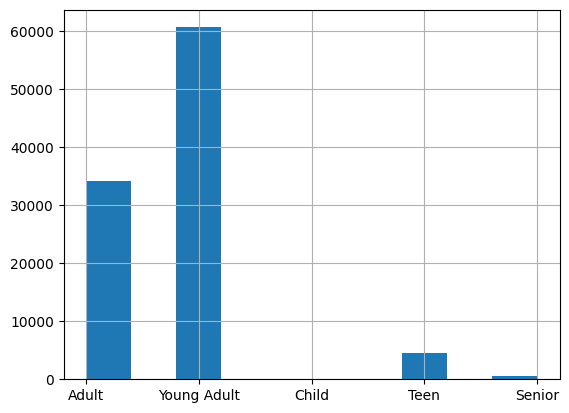

In [22]:
import matplotlib
df['user_age'].hist()

In [23]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)


In [24]:
for train_index, test_index in sss.split(X=df, y=df['user_age']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [25]:
strat_train_set

,user_id,item_id,rating,title,user_age,user_gender,user_occupation
72936,308,569,3,Wolf (1994),Adult,M,retired
38766,880,342,3,"Man Who Knew Too Little, The (1997)",Teen,M,student
76855,606,1010,3,Basquiat (1996),Young Adult,M,programmer
66350,929,204,4,Back to the Future (1985),Adult,M,scientist
93302,180,655,5,Stand by Me (1986),Young Adult,F,administrator
...,...,...,...,...,...,...,...
19299,339,182,5,GoodFellas (1990),Young Adult,M,lawyer
6360,181,1132,1,Feeling Minnesota (1996),Young Adult,M,executive
55958,805,322,2,Murder at 1600 (1997),Young Adult,F,other
72156,70,423,5,E.T. the Extra-Terrestrial (1982),Young Adult,M,engineer


In [26]:
# EDA

missing_values = df.isna().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 user_id            0
item_id            0
rating             0
title              0
user_age           0
user_gender        0
user_occupation    0
dtype: int64


In [29]:
ratings = pd.DataFrame(strat_train_set.groupby('title')['rating'].count())
ratings

,rating
title,
'Til There Was You (1997),7
1-900 (1994),5
101 Dalmatians (1996),79
12 Angry Men (1957),92
187 (1997),32
...,...
Young Guns II (1990),35
"Young Poisoner's Handbook, The (1995)",31
Zeus and Roxanne (1997),6


In [30]:
movies_with_enough_ratings = ratings[ratings['rating'] >= 100].index
filtered_strat_train_set = strat_train_set[strat_train_set['title'].isin(movies_with_enough_ratings)]
filtered_strat_train_set

,user_id,item_id,rating,title,user_age,user_gender,user_occupation
66350,929,204,4,Back to the Future (1985),Adult,M,scientist
93302,180,655,5,Stand by Me (1986),Young Adult,F,administrator
83236,887,98,3,"Silence of the Lambs, The (1991)",Teen,F,student
18834,222,82,4,Jurassic Park (1993),Young Adult,M,programmer
6549,639,204,3,Back to the Future (1985),Adult,F,librarian
...,...,...,...,...,...,...,...
50032,95,199,5,"Bridge on the River Kwai, The (1957)",Young Adult,M,administrator
63163,536,229,4,Star Trek III: The Search for Spock (1984),Adult,M,engineer
19299,339,182,5,GoodFellas (1990),Young Adult,M,lawyer
55958,805,322,2,Murder at 1600 (1997),Young Adult,F,other


In [31]:
moviepivot = filtered_strat_train_set.pivot_table(index='user_id',columns='title',values='rating')
moviepivot.head(10)

title,2001: A Space Odyssey (1968),"Abyss, The (1989)","African Queen, The (1951)",Air Force One (1997),Aladdin (1992),Alien (1979),Aliens (1986),Amadeus (1984),"American President, The (1995)",Annie Hall (1977),...,Unforgiven (1992),"Usual Suspects, The (1995)",Vertigo (1958),Volcano (1997),Wag the Dog (1997),When Harry Met Sally... (1989),While You Were Sleeping (1995),Willy Wonka and the Chocolate Factory (1971),"Wizard of Oz, The (1939)",Young Frankenstein (1974)
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,3.0,NaN,NaN,4.0,5.0,5.0,5.0,NaN,NaN,...,4.0,5.0,NaN,NaN,NaN,5.0,4.0,4.0,4.0,5.0
2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,4.0
6,5.0,NaN,NaN,NaN,2.0,4.0,NaN,4.0,NaN,5.0,...,3.0,4.0,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN
7,NaN,5.0,5.0,NaN,NaN,4.0,3.0,5.0,NaN,2.0,...,5.0,NaN,4.0,3.0,NaN,4.0,NaN,4.0,5.0,5.0
8,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
movie_ratings = moviepivot['Abyss, The (1989)']
similar_to_movie = moviepivot.corrwith(movie_ratings)
similar_to_movie

title
2001: A Space Odyssey (1968)                    0.141170
Abyss, The (1989)                               1.000000
African Queen, The (1951)                       0.442226
Air Force One (1997)                            0.087428
Aladdin (1992)                                  0.416347
                                                  ...   
When Harry Met Sally... (1989)                  0.223434
While You Were Sleeping (1995)                 -0.020812
Willy Wonka and the Chocolate Factory (1971)    0.049062
Wizard of Oz, The (1939)                        0.274142
Young Frankenstein (1974)                       0.222340
Length: 237, dtype: float64

In [33]:
# Model with Item-based Collaborative Filtering on Train Set

def movie_recommend_IIBCF(movie):

    try:
        # Get the target movie's ratings column from the pivot table.
        movie_ratings = moviepivot[str(movie)]

        # Ensure there are enough ratings to compute correlation
        if len(movie_ratings.dropna()) < 2:
            return "Insufficient data for correlation"



    # Get the correlation with the target movie's ratings from all movies from the pivot table.
        similar_to_movie = moviepivot.corrwith(movie_ratings)


    # Put the similar movies into a dataframe.
        corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])

    ### corr_movie.dropna(inplace=True) ###

    # Sort that dataframe from biggest correlation to smallest correlation.
        corr_movie.sort_values('Correlation', ascending=False)


### Dedicated to remove biased data points (movies with below 100 votes.) ###

    # Find the average rating of each movie in the pivot table.
        ratings = pd.DataFrame(strat_train_set.groupby('title')['rating'].mean())

    # Sort the average rating of each movie from biggest to smallest.
        ratings.sort_values('rating', ascending=False)

    # Count the total number of votes that generated the above mean for each movie.
        ratings['rating_vote_number'] = pd.DataFrame(strat_train_set.groupby('title')['rating'].count())

    #
        corr_movie = corr_movie.join(ratings['rating_vote_number'])

    #
        final = corr_movie[corr_movie['rating_vote_number']>100].sort_values('Correlation',ascending=False)

    #
        movie_rec = final.index[1]

    except Exception as e:
        return str(e)  # Return the error message for debugging

    print("Movie Recommendation: You can also watch: ************", movie_rec, "****************")

In [34]:
movie_recommend_IIBCF('Abyss, The (1989)')

Movie Recommendation: You can also watch: ************ Home Alone (1990) ****************


In [35]:
from sklearn.metrics.pairwise import cosine_similarity


In [36]:
moviepivot_nonull = filtered_strat_train_set.pivot_table(index='user_id',columns='title',values='rating', fill_value=0)
moviepivot_nonull.head(10)

title,2001: A Space Odyssey (1968),"Abyss, The (1989)","African Queen, The (1951)",Air Force One (1997),Aladdin (1992),Alien (1979),Aliens (1986),Amadeus (1984),"American President, The (1995)",Annie Hall (1977),...,Unforgiven (1992),"Usual Suspects, The (1995)",Vertigo (1958),Volcano (1997),Wag the Dog (1997),When Harry Met Sally... (1989),While You Were Sleeping (1995),Willy Wonka and the Chocolate Factory (1971),"Wizard of Oz, The (1939)",Young Frankenstein (1974)
user_id,,,,,,,,,,,,,,,,,,,,,
1,4,3,0,0,4,5,5,5,0,0,...,4,5,0,0,0,5,4,4,4,5
2,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0
4,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,4
6,5,0,0,0,2,4,0,4,0,5,...,3,4,5,0,0,0,0,3,0,0
7,0,5,5,0,0,4,3,5,0,2,...,5,0,4,3,0,4,0,4,5,5
8,0,0,0,0,0,5,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Model with Item-based Collaborative Filtering on Train Set

def item_to_item_collaborative_filtering(user_item_matrix):
    """
    Implement item-to-item collaborative filtering.

    Parameters:
    user_item_matrix (DataFrame): Matrix with users as rows and items as columns,
                                  values are interactions (e.g., ratings, views).

    Returns:
    DataFrame: Item-to-Item similarity matrix and recommendations.
    """
    # Calculate item similarity matrix
    item_similarity = cosine_similarity(user_item_matrix.T)
    item_similarity_df = pd.DataFrame(item_similarity,
                                      index=user_item_matrix.columns,
                                      columns=user_item_matrix.columns)

    def recommend_items(user_id, user_item_df, top_n=10):
        """
        Recommend items for a given user based on item similarity.

        Parameters:
        user_id (int): The user ID for whom to make recommendations.
        user_item_df (DataFrame): The user-item interaction matrix.
        top_n (int): Number of top recommendations to return.

        Returns:
        List: Top N item recommendations for the user.
        """
        interacted_items = user_item_df.loc[user_id]
        non_interacted_items = user_item_df.columns[interacted_items == 0]
        predictions = {}
        for item in non_interacted_items:
            pred_score = np.dot(user_item_df.loc[user_id],
                                item_similarity_df[item])
            predictions[item] = pred_score

        # Sort predictions in descending order and take top N
        sorted_predictions = sorted(predictions.items(),
                                    key=lambda x: x[1],
                                    reverse=True)[:top_n]
        return [pred[0] for pred in sorted_predictions]

    return recommend_items


In [38]:
user_id_input = int(input("Enter user id:"))

recommend = item_to_item_collaborative_filtering(moviepivot_nonull)

recommendations = recommend(user_id_input, moviepivot_nonull, top_n=1)

print(recommendations)


Enter user id:2
['Return of the Jedi (1983)']


In [39]:
# Model with User-based Collaborative Filtering on Train Set

def user_to_item_collaborative_filtering(user_item_matrix):
    """
    Implement user-to-item collaborative filtering.

    Parameters:
    user_item_matrix (DataFrame): Matrix with users as rows and items as columns,
                                  values are interactions (e.g., ratings, views).

    Returns:
    DataFrame: User-to-User similarity matrix and recommendations.
    """
    # Calculate user similarity matrix
    user_similarity = cosine_similarity(user_item_matrix)
    user_similarity_df = pd.DataFrame(user_similarity,
                                      index=user_item_matrix.index,
                                      columns=user_item_matrix.index)

    def recommend_items(user_id, user_item_df, top_n=10):
        """
        Recommend items for a given user based on user similarity.

        Parameters:
        user_id (int): The user ID for whom to make recommendations.
        user_item_df (DataFrame): The user-item interaction matrix.
        top_n (int): Number of top recommendations to return.

        Returns:
        List: Top N item recommendations for the user.
        """
        # Get similar users and their similarity scores
        similar_users = user_similarity_df[user_id].sort_values(ascending=False)
        similar_users = similar_users.drop(user_id)  # remove self-comparison

        # Aggregate ratings from similar users
        recommendations = pd.Series(dtype='float64')
        for similar_user, score in similar_users.items():
            similar_user_ratings = user_item_df.loc[similar_user]
            weighted_ratings = similar_user_ratings * score
            recommendations = recommendations.add(weighted_ratings, fill_value=0)

        # Exclude items already interacted by the user

        interacted_items = np.flatnonzero(user_item_df.loc[user_id])
        recommendations = recommendations.drop(index=user_item_matrix.columns[interacted_items])

        # Get top N recommendations
        top_recommendations = recommendations.nlargest(top_n)
        return list(top_recommendations.index)

    return recommend_items


In [40]:
user_id_input = int(input("Enter user id:"))

recommend = user_to_item_collaborative_filtering(moviepivot_nonull)

recommendations = recommend(user_id_input, moviepivot_nonull, top_n=1)

print(recommendations)


Enter user id:2
['Contact (1997)']
